In [ ]:
#kaggle.link(https://www.kaggle.com/mostafaalaa123/simple-house-prediction#Exploratory-Data-Analysis-(EDA))

In [123]:
# Data Analysis
import numpy as np
import pandas as pd
import random

# Statistics
from scipy.stats import norm
from scipy import stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

# ML
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg

# Another
import warnings
warnings.filterwarnings('ignore')

In [124]:
train_data = pd.read_csv(r"train.csv")
test_data = pd.read_csv(r"test.csv")

In [125]:
# train_data.columns.values
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [126]:
print(train_data.head())
print('='*75)
print(train_data.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [127]:
# Now let's put each category in it's own dataframe and then collect them
# I will make the code very easy to understand so don't worry if you're beginner

full = pd.DataFrame()
medium = pd.DataFrame()
remove_me = pd.DataFrame()

features = train_data.columns.values
number_of_houses = 1460 # try writing it train_data.shape[0]

for feature in features:
    if train_data[feature].count() == number_of_houses:
        full[feature] = train_data[feature]
    elif train_data[feature].count() > number_of_houses * 0.5: # Actually, that mean it has more than 50% non-null values
        medium[feature] = train_data[feature]
    else:
        remove_me[feature] = train_data[feature]
        

## Numerical

In [128]:
print('Number of numerical features: ', end='')
print(len(train_data.select_dtypes(include=['number']).columns.values))
train_data.describe(exclude=['O'])

Number of numerical features: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Categorical

In [129]:
print('Number of categorical features: ', end='')
print(len(train_data.select_dtypes(include=['O']).columns.values))
train_data.describe(include=['O'])

Number of categorical features: 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Exploratory Data Analysis (EDA)

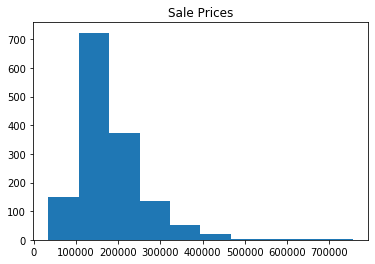

In [130]:
plt.hist(train_data['SalePrice'])
plt.title('Sale Prices')
plt.show()

In [131]:
remove_me

,Alley,PoolQC,Fence,MiscFeature
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1455,NaN,NaN,NaN,NaN
1456,NaN,NaN,MnPrv,NaN
1457,NaN,NaN,GdPrv,Shed
1458,NaN,NaN,NaN,NaN


In [132]:
#1
# train_data = train_data.drop(['Id'], axis=1)

#2
train_data = train_data.drop(remove_me.columns.values, axis=1)

#3

# First let's create the important data we will use
numerical_data = train_data.select_dtypes(include=['number'])
categorical_data = train_data.select_dtypes(include=['object'])

In [142]:
numerical_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,...,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,150,856,...,2,3,1,8,2003.0,2,548,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,284,1262,...,2,3,1,6,1976.0,2,460,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,434,920,...,2,3,1,6,2001.0,2,608,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,540,756,...,1,3,1,7,1998.0,3,642,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,490,1145,...,2,4,1,9,2000.0,3,836,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,953,953,...,2,3,1,7,1999.0,2,460,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,589,1542,...,2,3,1,7,1978.0,2,500,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,877,1152,...,2,4,1,9,1941.0,1,252,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0,1078,...,1,2,1,5,1950.0,1,240,4,2010,142125


In [137]:
# we want to know the ratio of (values equals zero) / 1460
# to each feature and if the feature has more than 50% ratio we will remove it
feature_zero_ratio = {feature:numerical_data.loc[numerical_data[feature] == 0,feature].count() / 1460 
                      for feature in numerical_data.columns.values}
feature_zero_ratio

{'Id': 0.0,
 'MSSubClass': 0.0,
 'LotFrontage': 0.0,
 'LotArea': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0,
 'BsmtUnfSF': 0.08082191780821918,
 'TotalBsmtSF': 0.025342465753424658,
 '1stFlrSF': 0.0,
 'GrLivArea': 0.0,
 'FullBath': 0.0061643835616438354,
 'BedroomAbvGr': 0.00410958904109589,
 'KitchenAbvGr': 0.0006849315068493151,
 'TotRmsAbvGrd': 0.0,
 'GarageYrBlt': 0.0,
 'GarageCars': 0.05547945205479452,
 'GarageArea': 0.05547945205479452,
 'MoSold': 0.0,
 'YrSold': 0.0,
 'SalePrice': 0.0}

##  Now let's drop features having more than 0.30 ratio

In [149]:
for feature in numerical_data:
    if feature_zero_ratio[feature] > 0.30:
        numerical_data = numerical_data.drop([feature], axis=1)
        train_data = train_data.drop([feature], axis=1)
        if feature in medium:
            medium = medium.drop([feature], axis=1)

train_data.shape


(1460, 61)

###  Now we want to see the relationship between numerical data and the target

['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF'
 'GrLivArea' 'FullBath' 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd'
 'GarageYrBlt' 'GarageCars' 'GarageArea' 'MoSold' 'YrSold' 'SalePrice']
22


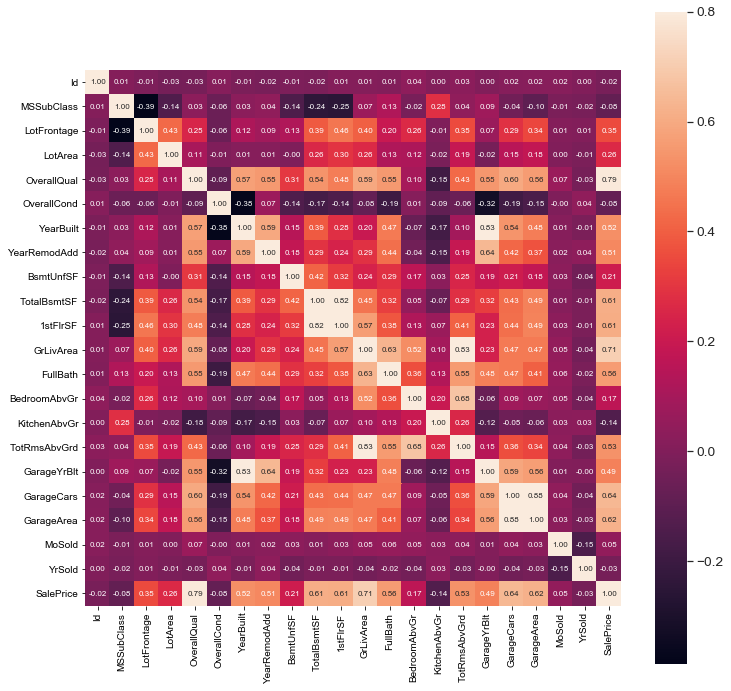

In [150]:
print(numerical_data.columns.values)
print(len(numerical_data.columns.values))

corrmat = numerical_data.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, annot_kws={'size': 8}, fmt='.2f')
plt.show()

### Let's zoom in to the most 10 largest relationship

['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt']


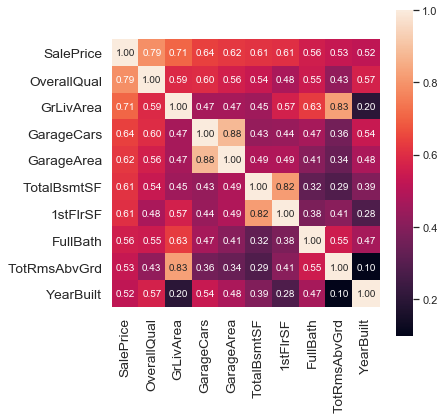

In [151]:
n = 10
most_largest_features = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
zoomed_corrmat = np.corrcoef(numerical_data[most_largest_features].values.T)
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(font_scale=1)
sns.heatmap(zoomed_corrmat, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=most_largest_features.values, xticklabels=most_largest_features.values)
print(most_largest_features.values)